In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from collections import defaultdict

# Data Preparation

In [2]:
# we use the dataset without duplicated columns

X_test_df = pd.read_csv('best_X_test_con_nomi.csv', header = 0)
y_train_df = pd.read_csv('y_train_wo_outliers_num.csv', header = None)
X_train_df = pd.read_csv('best_X_train_con_nomi.csv', header = 0)
y_test_df = pd.read_fwf('y_test.txt', header = None)

In [3]:
X_test = X_test_df.values
y_train = y_train_df.values
X_train = X_train_df.values
y_test = y_test_df.values

remove class 5

In [4]:
X_train_n=np.zeros(shape=[0,23])
y_train_n=np.zeros(shape=[0,1])
for j in range(0,7274):
  if y_train[j]!=6:

    X_train_n = np.append(X_train_n, [X_train[j]], axis=0)
    y_train_n = np.append(y_train_n, [y_train[j]], axis=0)

X_test_n=np.zeros(shape=[0,23])
y_test_n=np.zeros(shape=[0,1])
for j in range(0,len(y_test)):
  if y_test[j]!=6:

    X_test_n = np.append(X_test_n, [X_test[j]], axis=0)
    y_test_n = np.append(y_test_n, [y_test[j]], axis=0)

X_test=X_test_n
y_test=y_test_n
X_train=X_train_n
y_train=y_train_n

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_confusion_matrix

In [6]:
from sklearn.preprocessing import StandardScaler

normalize

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#SVM

Support Vector Machine with default parameters

In [8]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

Confusion matrix to understand how good the calssifier works.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


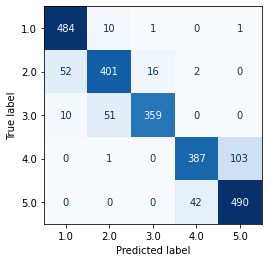

In [10]:
plot_confusion_matrix(clf_svm,
                      X_test,
                      y_test,
                      cmap='Blues',
                      values_format='d',
                      colorbar=False
                      )
plt.savefig('confusion_matrix.pdf',bbox_inches = 'tight')

In this case, the classifier works pretty well, in particular for the class 3. The highest misclassification is between classes 4 and 5, and 1 and 2 (and 3).  

In [11]:
y_pred = clf_svm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8800829875518672
F1-score [0.92898273 0.85867238 0.90201005 0.83947939 0.87033748]
              precision    recall  f1-score   support

         1.0       0.89      0.98      0.93       496
         2.0       0.87      0.85      0.86       471
         3.0       0.95      0.85      0.90       420
         4.0       0.90      0.79      0.84       491
         5.0       0.82      0.92      0.87       532

    accuracy                           0.88      2410
   macro avg       0.89      0.88      0.88      2410
weighted avg       0.88      0.88      0.88      2410



To do better we perform a grid search for the parameters. The search for the kernel is not done because the other ones are basically shit and takes too much time.

In [12]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
             'gamma': ['auto','scale',1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']},
                
]

In [13]:
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(X_train,y_train)
print(optimal_params.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [15]:
target_names=['WALKING','WALKING UPSTAIRS','WALKING DOWNSTAIRS','SITTING','STANDING']

new analysis with optimal hyperparameters

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.8780082987551867
F1-score [0.91803279 0.84756757 0.90774908 0.84245077 0.87356322]
\begin{tabular}{lrrrr}
\toprule
{} &  precision &    recall &  f1-score &      support \\
\midrule
WALKING            &   0.879852 &  0.959677 &  0.918033 &   496.000000 \\
WALKING UPSTAIRS   &   0.863436 &  0.832272 &  0.847568 &   471.000000 \\
WALKING DOWNSTAIRS &   0.938931 &  0.878571 &  0.907749 &   420.000000 \\
SITTING            &   0.910165 &  0.784114 &  0.842451 &   491.000000 \\
STANDING           &   0.824708 &  0.928571 &  0.873563 &   532.000000 \\
accuracy           &   0.878008 &  0.878008 &  0.878008 &     0.878008 \\
macro avg          &   0.883419 &  0.876641 &  0.877873 &  2410.000000 \\
weighted avg       &   0.880943 &  0.878008 &  0.877254 &  2410.000000 \\
\bottomrule
\end{tabular}



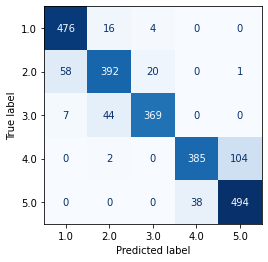

In [16]:
clf_svm = SVC(random_state=42,C=10,gamma=0.01)
clf_svm.fit(X_train, y_train)

plot_confusion_matrix(clf_svm,
                      X_test,
                      y_test,
                      cmap='Blues',
                      values_format='d',
                      colorbar=False
                      )
plt.savefig('confusion_matrix_svm.pdf',bbox_inches = 'tight')

y_pred = clf_svm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

report=classification_report(y_test, y_pred,output_dict=True,digits=2,target_names=target_names)
report_df = pd.DataFrame(report).transpose()

print(report_df.to_latex())

# PCA

In [20]:
from sklearn.decomposition import PCA

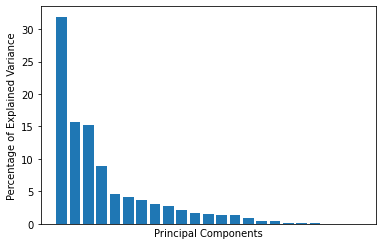

In [21]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

per_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.show()

To visualize it, we perform a PCA. How many components? Better 3, because the jump between 3 and 4 is higher than the one between 2 and 3.

In [57]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_pca = pca.transform(X_train)

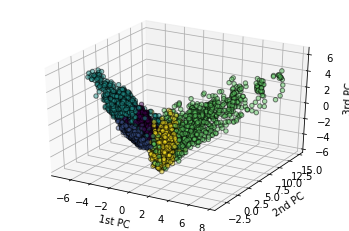

In [58]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_train, edgecolor='k', alpha=0.5)

ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')
plt.savefig('pca_svm.pdf', bbox_inches = 'tight')
plt.show()

Qua sotto ti faccio pure l'analisi a due componenti. Così, perché mi va.

In [55]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

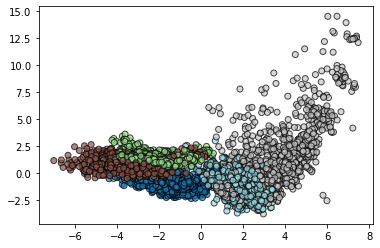

In [56]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='tab20', edgecolor='k', alpha=0.7)
plt.show()

# Vectors

PCA e vettori

In [50]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [51]:
decision_function = clf_svm.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

In [52]:
support_vectors_pca = pca.transform(support_vectors)

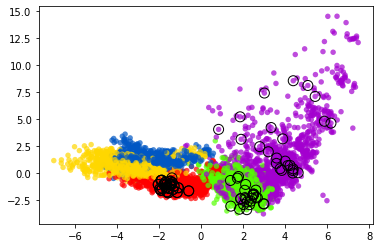

In [54]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

plt.savefig('vectors.pdf', bbox_inches = 'tight')

plt.show()

# Nonlinear SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9036308109942314
F1-score [0.92917847 0.88596491 0.92039801 0.82028666 0.85764499 1.        ]
              precision    recall  f1-score   support

           1       0.87      0.99      0.93       496
           2       0.92      0.86      0.89       471
           3       0.96      0.88      0.92       420
           4       0.89      0.76      0.82       491
           5       0.81      0.92      0.86       532
           6       1.00      1.00      1.00       537

    accuracy                           0.90      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.91      0.90      0.90      2947



In [ ]:
clf = SVC(gamma='auto', C=0.1, kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.8971835765184933
F1-score [0.93119698 0.89297297 0.9164557  0.7942158  0.84017467 1.        ]
              precision    recall  f1-score   support

           1       0.87      1.00      0.93       496
           2       0.91      0.88      0.89       471
           3       0.98      0.86      0.92       420
           4       0.88      0.73      0.79       491
           5       0.78      0.90      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.90      2947
   macro avg       0.90      0.89      0.90      2947
weighted avg       0.90      0.90      0.90      2947



In [ ]:
clf.support_

array([  84,   89,   97, ..., 6792, 6797, 6975], dtype=int32)

In [ ]:
clf.support_vectors_[:10]

array([[ 3.70349533,  0.63040434,  3.70887728,  4.53061433,  0.93972627,
         1.69447993,  2.53483718,  3.69625054, -0.05618889, -0.71081667,
         1.58090811,  0.49219417,  1.46734882,  1.8922558 , -0.78109986,
         0.01538851, -0.03105241,  0.10965704, -0.58764836, -0.38005792,
         3.51515285,  1.22105075,  3.43030786,  4.18330452,  0.67257225,
         0.96603976,  1.23781085,  2.38648004, -0.07603372, -0.16302528],
       [ 0.36788478, -1.16667049,  0.45755643,  0.16094877,  0.78952217,
         2.12030315,  1.52236062,  1.3043842 ,  2.56941796,  1.01348088,
         0.14048144, -0.92541272,  0.26856587,  0.11312214, -0.07582744,
         1.60834314,  0.99342223,  1.71191941,  1.92619105,  0.23090838,
         0.3977678 , -1.08248059,  0.56094208,  0.20045226,  0.30989609,
         2.18670264,  1.69344054,  1.93356066,  2.81413782,  0.84443751],
       [-0.24139762,  0.61623555, -0.24008879, -0.32786798,  0.06282046,
         0.02394269, -0.0729913 ,  0.11057149, -0

In [ ]:
clf.n_support_, len(X_train)

(array([408, 451, 376, 811, 773, 204], dtype=int32), 7274)